In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
df = pd.read_csv("../kaggle/Hous Prices/train.csv")
df_selected = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "SalePrice"], test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values 

scaler = StandardScaler()
scaler.fit(X_train)
# 標準化
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

/Users/shun/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 自分で改造する用

In [68]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr  
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.w = np.random.rand(X_train.shape[1],1)
        self.X = X_train
        self.y = y_train 
        
    def _linear_hypothesis(self):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        y_hat = np.dot(self.X, self.w)
        return y_hat
    
    def _compute_cost(self):
        y_hat = self._linear_hypothesis()
        self.y = self.y.reshape(X_train.shape[0],1)
        error = (1/(2*X_train.shape[0])) * np.sum((self.y - y_hat)**2, axis=0)
        return error
    
    
    def _gradient_descent(self, error):
        """
        説明を記述
        """       
        w_grad = np.dot(self.X.T,np.dot(self.X, self.w)) - np.dot((self.X).T, self.y)
        return w_grad
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        for i in range(self.iter):
            error = self._compute_cost()
            w_grad = self._gradient_descent(error)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                self.w = self.w - w_grad*self.lr
                print(error)
                self.loss[i] = error
            
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return
        

In [110]:
model = ScratchLinearRegression(10, 0.0000000001, verbose=True)

In [111]:
model.fit(X_train, y_train)

[1.91914542e+10]
[3.5443236e+09]
[2.06983972e+09]
[1.92036805e+09]
[1.89515681e+09]
[1.88196862e+09]
[1.8702989e+09]
[1.8591515e+09]
[1.84841945e+09]
[1.83807939e+09]


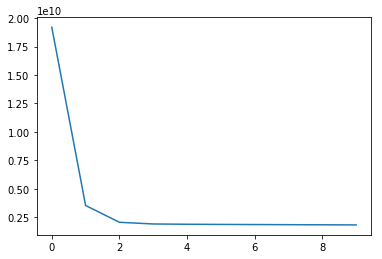

In [112]:
import matplotlib.pyplot as plt

plt.plot(model.loss)